In [1]:
library(statnet)
library(stats)

Loading required package: tergm

Loading required package: ergm

Loading required package: network

network: Classes for Relational Data
Version 1.16.1 created on 2020-10-06.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.



ergm: version 3.11.0, created on 2020-10-14
Copyright (c) 2020, Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Carter T. Butts, University of California -- Irvine
                    Steven M. Goodreau, University of Washington
                    Pavel N. Krivitsky, UNSW Sydney
                    M

               Installed ReposVer Built  
EpiModel       "2.0.3"   "2.1.0"  "4.0.5"
ergm           "3.11.0"  "4.1.2"  "4.0.5"
ergm.count     "3.4.0"   "4.0.2"  "4.0.5"
ergm.ego       "0.6.1"   "1.0.0"  "4.0.5"
ergm.rank      "1.2.0"   "4.0.0"  "4.0.5"
network        "1.16.1"  "1.17.1" "4.0.5"
networkDynamic "0.10.1"  "0.11.0" "4.0.5"
statnet.common "4.4.1"   "4.5.0"  "4.0.5"
tergm          "3.7.0"   "4.0.1"  "4.0.5"


Restart R and use "statnet::update_statnet()" to get the updates.



In [2]:
el_dist = read.csv("../data/features/dist.csv", stringsAsFactors = FALSE)
el_dist$log_dist = log(el_dist$dist)
dist_net = network(el_dist, directed = TRUE, matrix.type = "edgelist")
set.edge.value(dist_net, "dist", el_dist$dist)
set.edge.value(dist_net, "log_dist", el_dist$log_dist)
dist_net

 Network attributes:
  vertices = 184 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 33856 
    missing edges= 0 
    non-missing edges= 33856 

 Vertex attribute names: 
    vertex.names 

 Edge attribute names not shown 

In [3]:
el_diplomatic = read.csv("../data/features/dip_exhange_clean.csv", stringsAsFactors = FALSE)
diplomatic_exchange_net = network(el_diplomatic, directed = TRUE, matrix.type = "edgelist")
diplomatic_exchange_net

 Network attributes:
  vertices = 184 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 8295 
    missing edges= 0 
    non-missing edges= 8295 

 Vertex attribute names: 
    vertex.names 

 Edge attribute names not shown 

In [4]:
el = read.csv("../data/edgelist_2011.csv", stringsAsFactors = FALSE)
nl = read.csv("../data/nodelist_2011.csv", stringsAsFactors = FALSE)

In [10]:
nl$gdp_us_dollar <- log(nl$gdp_us_dollar)
nl$log_area <- log(nl$area)
nl$log_population <- log(nl$population)

In [15]:
nl$scaled_gdp_us_dollar = as.numeric(scale(nl$gdp_us_dollar))
nl$scaled_gdp_growth = as.numeric(scale(nl$gdp_growth))
nl$scaled_inflation_rate = as.numeric(scale(nl$inflation_rate))
nl$scaled_population = as.numeric(scale(nl$log_population))

In [16]:
net = network(el, directed = TRUE, matrix.type = 'edgelist', vertex.attr=nl, vertex.attrnames=colnames(nl), ignore.eval = FALSE, names.eval='trade')
set.edge.value(net, "trade", el$weight)
net

 Network attributes:
  vertices = 184 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 3774 
    missing edges= 0 
    non-missing edges= 3774 

 Vertex attribute names: 
    area colonizer continent country_iso3 gdp_growth gdp_us_dollar inflation_rate landlocked langoff_1 log_area log_population population scaled_gdp_growth scaled_gdp_us_dollar scaled_inflation_rate scaled_population vertex.names 

 Edge attribute names not shown 

In [17]:
model = ergm(
                        net ~
                        edges +
                        mutual +
                        nodecov("scaled_gdp_us_dollar") +
                        absdiff("scaled_gdp_us_dollar") +
                        nodecov("scaled_inflation_rate") +
                        absdiff("scaled_inflation_rate") +
                        nodecov("scaled_gdp_growth") +
                        absdiff("scaled_gdp_growth") +
                        nodematch("colonizer") +
                        nodematch("continent") +
                        nodematch("landlocked") +
                        nodematch("langoff_1") +
                        edgecov(diplomatic_exchange_net) +
                        nodecov("scaled_population")
                )

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Starting Monte Carlo maximum likelihood estimation (MCMLE):

Iteration 1 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 1.722.

Step length converged once. Increasing MCMC sample size.

Iteration 2 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 0.7393.

Step length converged twice. Stopping.

Finished MCMLE.

Evaluating log-likelihood at the estimate. 
Using 20 bridges: 
1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
.

This model was fit using MCMC.  To examine model diagnostics and check
for degeneracy, use the mcmc.diagnostics() function.



In [18]:
summary(model)

Call:
ergm(formula = net ~ edges + mutual + nodecov("scaled_gdp_us_dollar") + 
    absdiff("scaled_gdp_us_dollar") + nodecov("scaled_inflation_rate") + 
    absdiff("scaled_inflation_rate") + nodecov("scaled_gdp_growth") + 
    absdiff("scaled_gdp_growth") + nodematch("colonizer") + nodematch("continent") + 
    nodematch("landlocked") + nodematch("langoff_1") + edgecov(diplomatic_exchange_net) + 
    nodecov("scaled_population"))

Iterations:  2 out of 20 

Monte Carlo MLE Results:
                                Estimate Std. Error MCMC % z value Pr(>|z|)    
edges                           -1.86669    0.05310      0 -35.156  < 1e-04 ***
mutual                           0.33731    0.06692      0   5.040  < 1e-04 ***
nodecov.scaled_gdp_us_dollar     0.27333    0.02781      0   9.828  < 1e-04 ***
absdiff.scaled_gdp_us_dollar     0.20473    0.02121      0   9.650  < 1e-04 ***
nodecov.scaled_inflation_rate   -0.03233    0.02508      0  -1.289 0.197318    
absdiff.scaled_inflation_rate   

In [10]:
gof <- gof(model ~ model + distance + dspartners + odegree + idegree + triadcensus)

In [11]:
gof


Goodness-of-fit for model statistics 

                                      obs         min      mean         max
edges                           3773.0000 3649.000000 3779.0800 3910.000000
mutual                           323.0000  280.000000  325.3500  363.000000
nodecov.scaled_gdp_us_dollar    -293.3424 -479.837669 -303.4962 -120.717741
absdiff.scaled_gdp_us_dollar    4792.3305 4623.918417 4801.0344 4974.816164
nodecov.scaled_inflation_rate   -134.5270 -329.288983 -136.3598    1.013412
absdiff.scaled_inflation_rate   3246.6065 3093.819860 3250.3679 3469.852467
nodecov.scaled_gdp_growth        170.0159   -3.069661  146.1493  304.412306
absdiff.scaled_gdp_growth       2656.6299 2515.055771 2659.0879 2800.389465
nodematch.colonizer             1348.0000 1262.000000 1352.0600 1435.000000
nodematch.continent              555.0000  488.000000  555.0800  617.000000
nodematch.landlocked            2383.0000 2287.000000 2392.5400 2522.000000
nodematch.langoff_1              308.0000  261.0

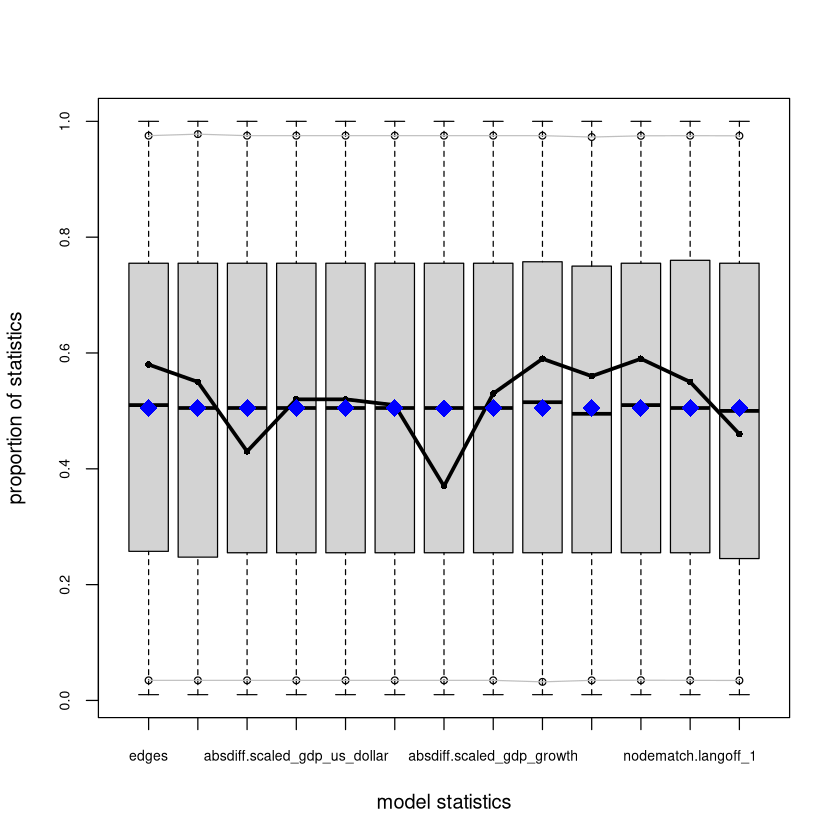

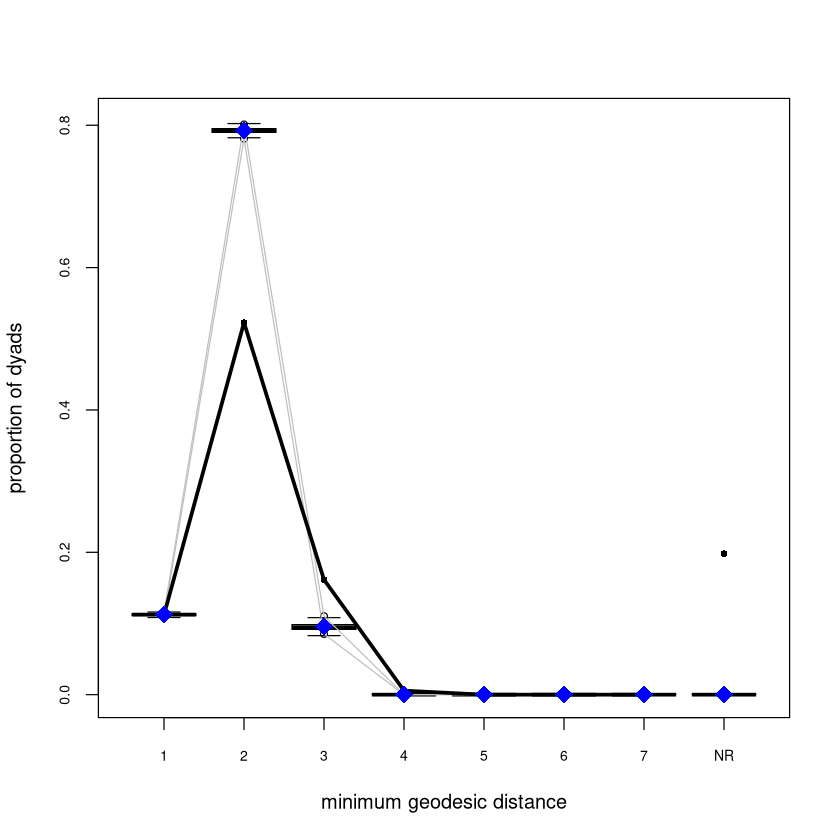

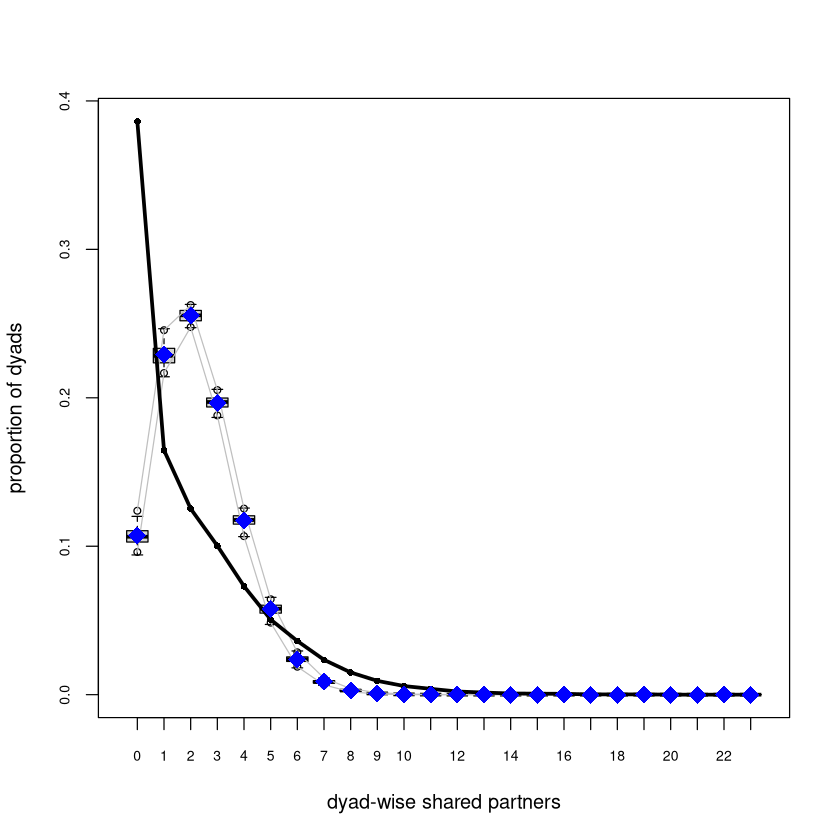

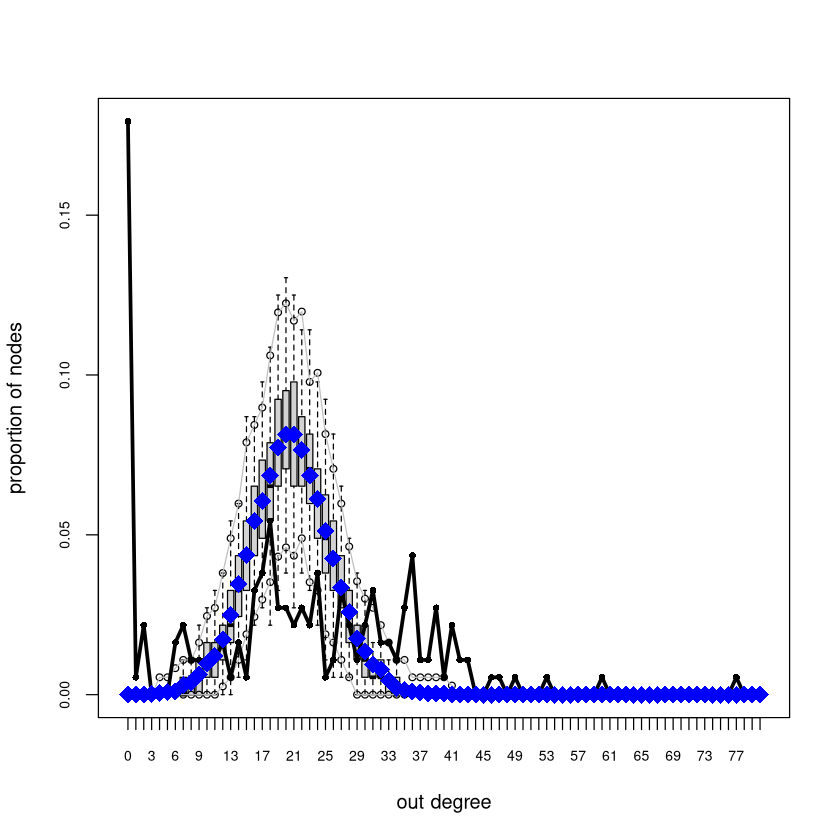

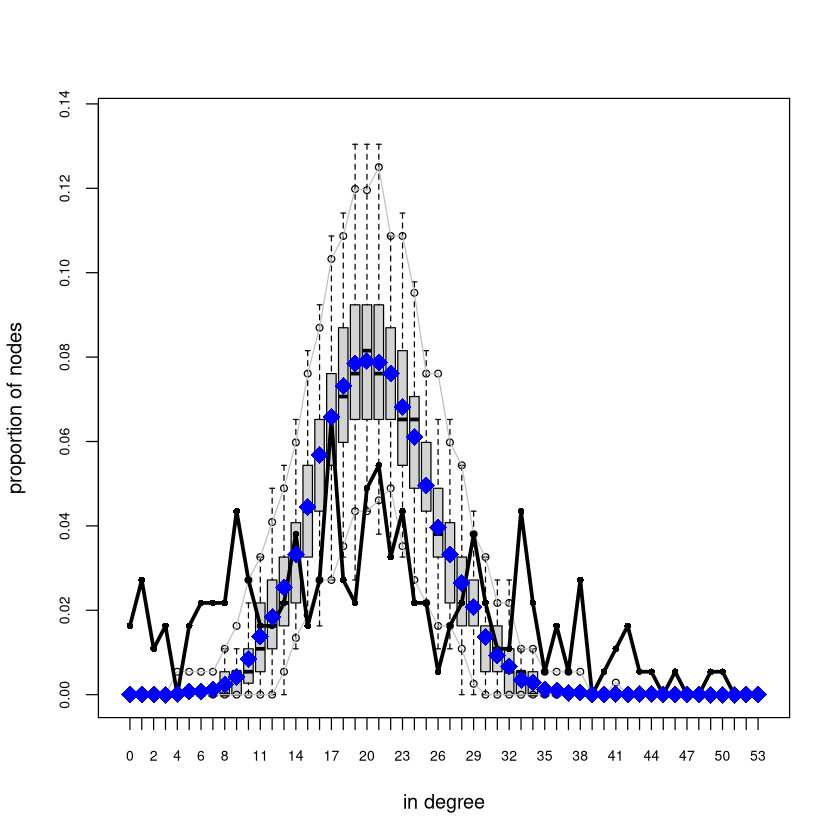

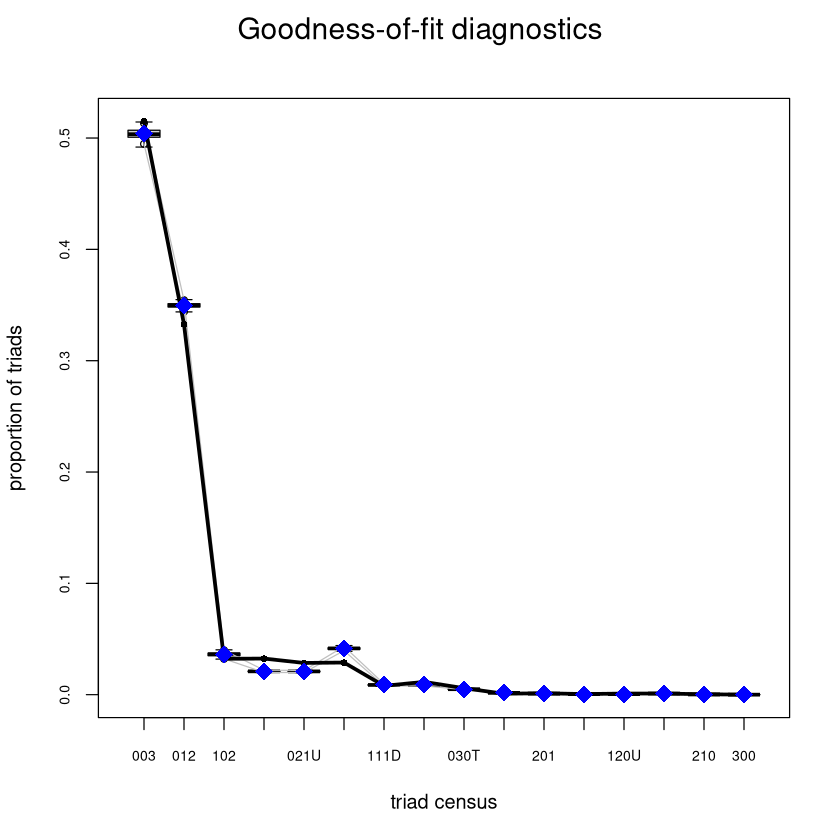

In [12]:
plot(gof)

Sample statistics summary:

Iterations = 16384:4209664
Thinning interval = 1024 
Number of chains = 1 
Sample size per chain = 4096 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                                   Mean    SD Naive SE Time-series SE
edges                            4.5750 60.74   0.9491         4.4097
mutual                           5.5166 18.21   0.2846         1.1308
nodecov.scaled_gdp_us_dollar    -9.6124 70.21   1.0970         4.2637
absdiff.scaled_gdp_us_dollar     4.7195 90.98   1.4216         6.7072
nodecov.scaled_inflation_rate   17.8052 85.23   1.3317         6.0652
absdiff.scaled_inflation_rate    8.2796 87.55   1.3680         6.3610
nodecov.scaled_gdp_growth       -2.2583 67.73   1.0583         4.0744
absdiff.scaled_gdp_growth       20.0385 69.74   1.0896         4.5235
nodematch.colonizer             -4.1118 34.96   0.5462         2.3924
nodematch.continent              3.5469 24.03   0.3754         1.5788

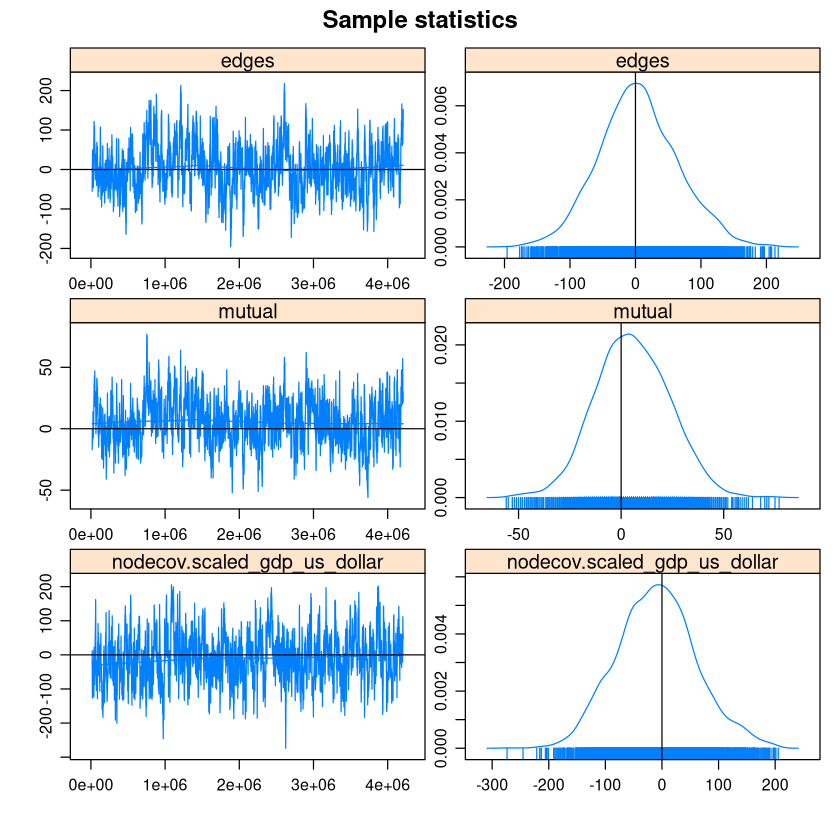

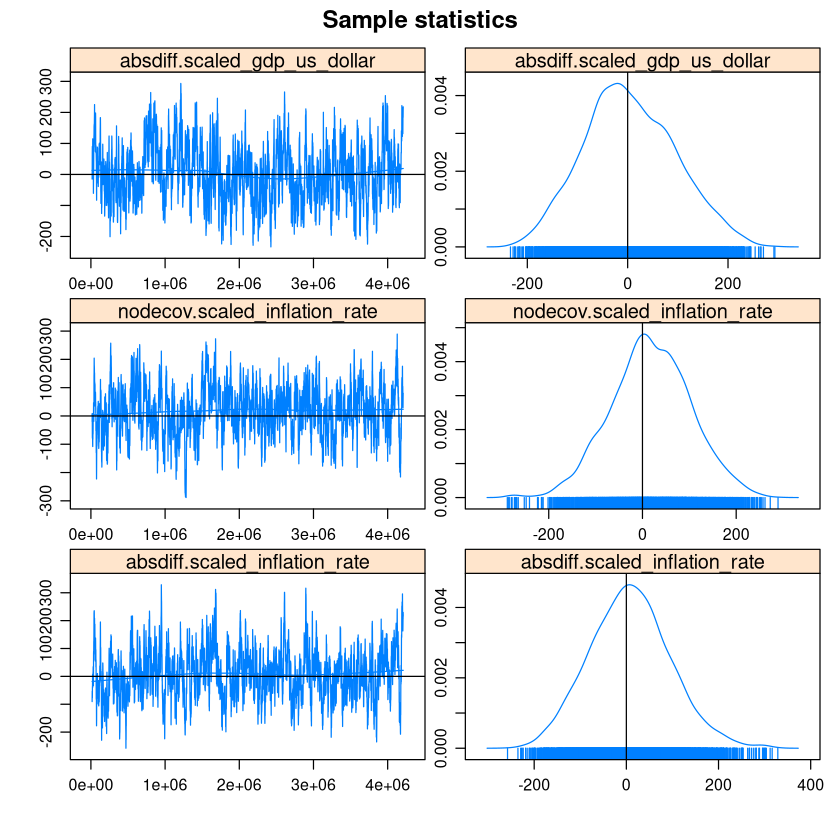

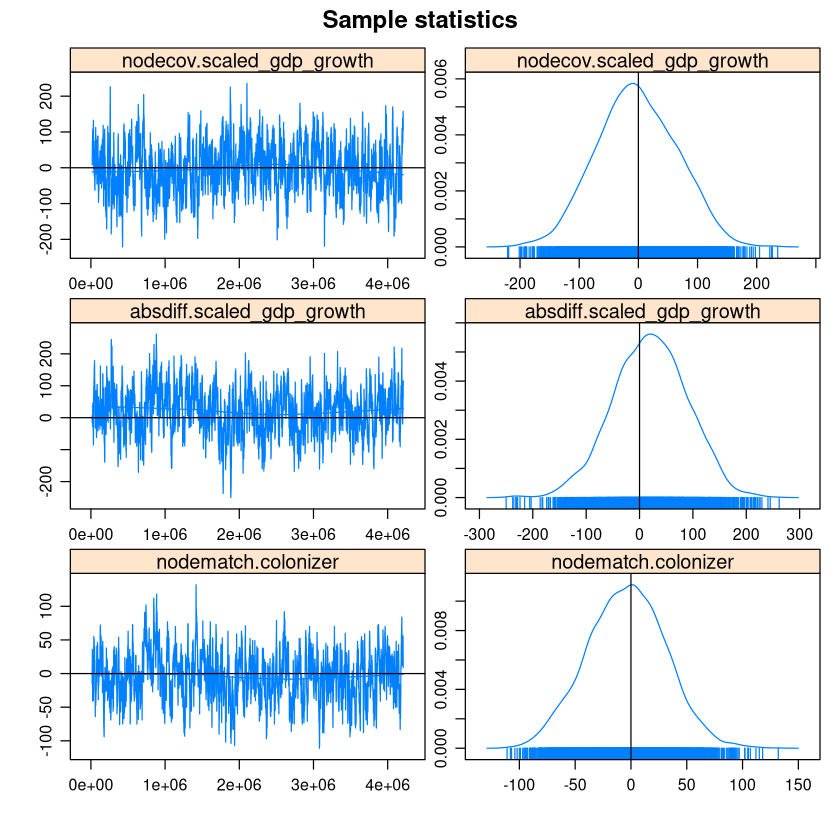

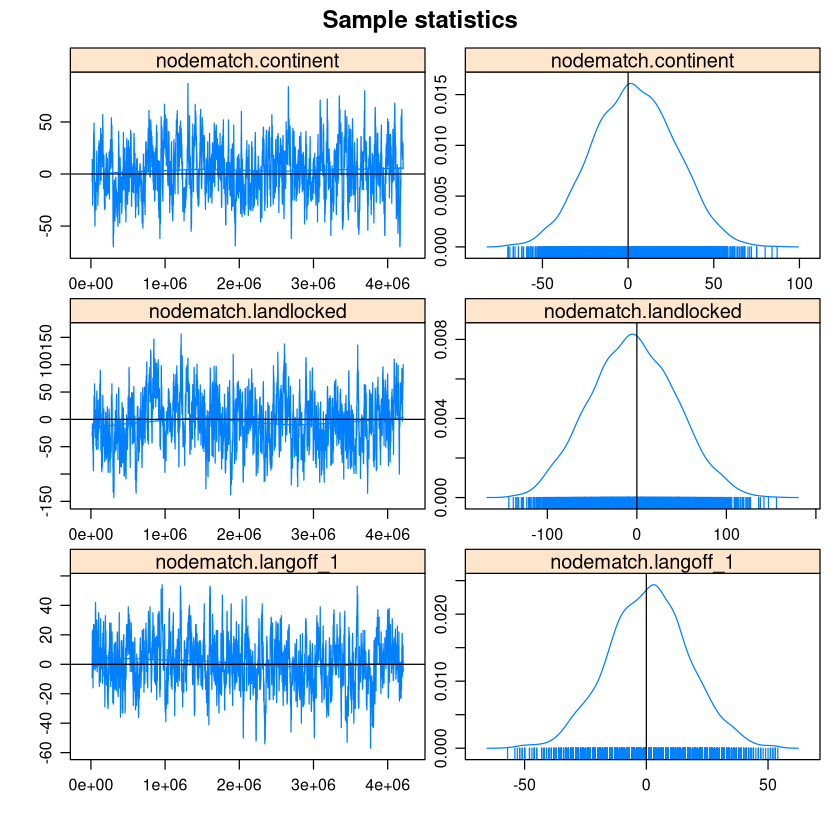


MCMC diagnostics shown here are from the last round of simulation, prior to computation of final parameter estimates. Because the final estimates are refinements of those used for this simulation run, these diagnostics may understate model performance. To directly assess the performance of the final model on in-model statistics, please use the GOF command: gof(ergmFitObject, GOF=~model).


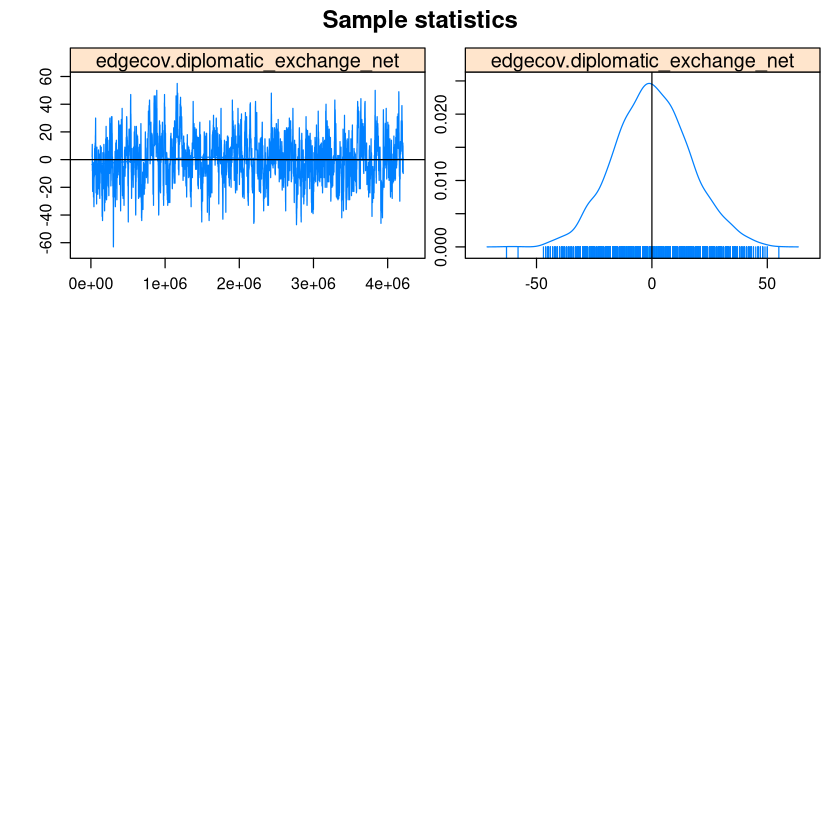

In [13]:
mcmc.diagnostics(model)